In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train = pd.read_csv('train.csv')

<IPython.core.display.Javascript object>

In [34]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [35]:
# happy customers have TARGET==0, unhappy custormers have TARGET==1
# A little less then 4% are unhappy => unbalanced dataset
df = pd.DataFrame(train.TARGET.value_counts())
df['Percentage'] = 100*df['TARGET']/train.shape[0]
df


<IPython.core.display.Javascript object>

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


In [36]:
#split the data
X = train.drop('TARGET', axis=1)
y = train.TARGET

In [37]:
X_train, X_valid, y_train,y_valid = train_test_split(X, y ,test_size=0.2, random_state=0)

In [50]:
#create the classifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators: 500 
xgb_clf = XGBClassifier(n_estimators=500, eta = 0.0202048,max_depth = 5, scale_pos_weight=24.27,
                        subsample  = 0.6815,colsample_bytree= 0.701, random_state=0)

# evaluation: auc, early_stopping_roubnds: 100. 
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_valid)


In [51]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_valid, y_pred)
cnf_matrix



array([[11747,  2823],
       [  173,   461]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

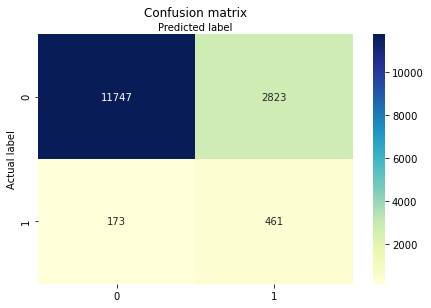

In [52]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [53]:
xgb_roc_score = roc_auc_score(y_valid, xgb_clf.predict_proba(X_valid)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.8412


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

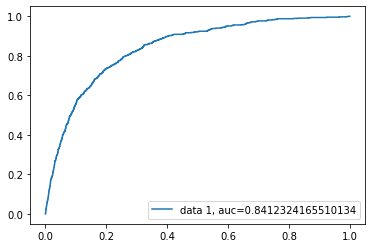

In [54]:
from sklearn.metrics import roc_curve
y_pred_proba = xgb_clf.predict_proba(X_valid)[:,1]
fpr, tpr, _ = roc_curve(y_valid,  y_pred_proba)
#auc = metrics.roc_auc_score(y_valid.values, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(xgb_roc_score))
plt.legend(loc=4)
plt.show()